## Ganomaly 구현 - Casting data

- 이미지 사이즈 128
- 채널 수 1


참고한 코드 출처 : https://github.com/leafinity/keras_ganomaly/blob/master/ganomaly.ipynb

이 코드를 참고하여 모델 구조 수정 및 새 데이터 적용


In [ ]:
from keras import layers
import keras
import keras.backend as K

# Models

In [ ]:
width = 128
height = 128
channels = 1

## Generators Encoder


In [ ]:
input_layer = layers.Input(name='input', shape=(height, width, channels))

# Encoder
x = layers.Conv2D(64, (4,4), strides=(2,2), padding='same', name='conv_1')(input_layer)
x = layers.LeakyReLU(name='leaky_1')(x)

x = layers.Conv2D(128, (4,4), strides=(2,2), padding='same', name='add_1')(x)
x = layers.BatchNormalization(name='norm_add_1')(x)
x = layers.LeakyReLU(name='leaky_add_1')(x)

x = layers.Conv2D(256, (4,4), strides=(2,2), padding='same', name='conv_2')(x)
x = layers.BatchNormalization(name='norm_2')(x)
x = layers.LeakyReLU(name='leaky_2')(x)


x = layers.Conv2D(512, (4,4), strides=(2,2), padding='same', name='conv_3')(x)
x = layers.BatchNormalization(name='norm_3')(x)
x = layers.LeakyReLU(name='leaky_3')(x)

x = layers.Conv2D(1024, (4,4), strides=(2,2), padding='same', name='conv_4')(x)
x = layers.BatchNormalization(name='norm_4')(x)
x = layers.LeakyReLU(name='leaky_4')(x)

x = layers.Conv2D(100, (4,4), strides=(1,1), padding='valid', name='g_encoder_output')(x)
#x = layers.GlobalAveragePooling2D(name='g_encoder_output')(x)

g_e = keras.models.Model(inputs=input_layer, outputs=x)

g_e.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 128, 128, 1)]     0         
                                                                 
 conv_1 (Conv2D)             (None, 64, 64, 64)        1088      
                                                                 
 leaky_1 (LeakyReLU)         (None, 64, 64, 64)        0         
                                                                 
 add_1 (Conv2D)              (None, 32, 32, 128)       131200    
                                                                 
 norm_add_1 (BatchNormalizat  (None, 32, 32, 128)      512       
 ion)                                                            
                                                                 
 leaky_add_1 (LeakyReLU)     (None, 32, 32, 128)       0         
                                                          

## Generator

In [ ]:
input_layer = layers.Input(name='input', shape=(height, width, channels))

x = g_e(input_layer)

y = layers.Conv2DTranspose(1024, (4,4), strides=(1,1), padding='valid', name='start')(x)
y = layers.BatchNormalization(name='norm_0')(y)
y = layers.ReLU(name='de_relu_0')(y)

y = layers.Conv2DTranspose(512, (4,4), strides=(2,2), padding='same', name='deconv_1')(y)
y = layers.BatchNormalization(name='norm_1')(y)
y = layers.ReLU(name='de_relu_1')(y)

y = layers.Conv2DTranspose(256, (4,4), strides=(2,2), padding='same', name='deconv_2')(y)
y = layers.BatchNormalization(name='norm_2')(y)
y = layers.ReLU(name='de_relu_2')(y)

y = layers.Conv2DTranspose(128, (4,4), strides=(2,2), padding='same', name='deconv_3')(y)
y = layers.BatchNormalization(name='norm_3')(y)
y = layers.ReLU(name='de_relu_3')(y)

y = layers.Conv2DTranspose(64, (4,4), strides=(2,2), padding='same', name='deconv_4')(y)
y = layers.BatchNormalization(name='norm_4')(y)
y = layers.ReLU(name='de_relu_4')(y)

y = layers.Conv2DTranspose(channels, (4,4), strides=(2,2), padding='same', name='decoder_deconv_output', activation='tanh')(y)

g = keras.models.Model(inputs=input_layer, outputs=y)

g.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 128, 128, 1)]     0         
                                                                 
 model_11 (Functional)       (None, 1, 1, 100)         12790308  
                                                                 
 start (Conv2DTranspose)     (None, 4, 4, 1024)        1639424   
                                                                 
 norm_0 (BatchNormalization)  (None, 4, 4, 1024)       4096      
                                                                 
 de_relu_0 (ReLU)            (None, 4, 4, 1024)        0         
                                                                 
 deconv_1 (Conv2DTranspose)  (None, 8, 8, 512)         8389120   
                                                                 
 norm_1 (BatchNormalization)  (None, 8, 8, 512)        204

## Encoder

In [ ]:
input_layer = layers.Input(name='input', shape=(height, width, channels))

# Encoder
z = layers.Conv2D(64, (4,4), strides=(2,2), padding='same', name='encoder_conv_1')(input_layer)
z = layers.LeakyReLU(name='encoder_leaky_1')(z)

z = layers.Conv2D(128, (4,4), strides=(2,2), padding='same', name='encoder_add_2')(z)
z = layers.BatchNormalization(name='encoder_norm_add_2')(z)
z = layers.LeakyReLU(name='encoder_leaky_add_2')(z)

z = layers.Conv2D(256, (4,4), strides=(2,2), padding='same', name='encoder_conv_2')(z)
z = layers.BatchNormalization(name='encoder_norm_2')(z)
z = layers.LeakyReLU(name='encoder_leaky_2')(z)


z = layers.Conv2D(512, (4,4), strides=(2,2), padding='same', name='encoder_conv_3')(z)
z = layers.BatchNormalization(name='encoder_norm_3')(z)
z = layers.LeakyReLU(name='encoder_leaky_3')(z)

z = layers.Conv2D(1024, (4,4), strides=(2,2), padding='same', name='encoder_conv_4')(z)
z = layers.BatchNormalization(name='encoder_norm_4')(z)
z = layers.LeakyReLU(name='encoder_leaky_4')(z)

z = layers.Conv2D(100, (4,4), strides=(1,1), padding='valid', name='encoder_output')(z)
#z = layers.GlobalAveragePooling2D(name='g_encoder_output')(z)

encoder = keras.models.Model(input_layer, z)

encoder.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 128, 128, 1)]     0         
                                                                 
 encoder_conv_1 (Conv2D)     (None, 64, 64, 64)        1088      
                                                                 
 encoder_leaky_1 (LeakyReLU)  (None, 64, 64, 64)       0         
                                                                 
 encoder_add_2 (Conv2D)      (None, 32, 32, 128)       131200    
                                                                 
 encoder_norm_add_2 (BatchNo  (None, 32, 32, 128)      512       
 rmalization)                                                    
                                                                 
 encoder_leaky_add_2 (LeakyR  (None, 32, 32, 128)      0         
 eLU)                                                     

## feature extractor

In [ ]:
input_layer = layers.Input(name='input', shape=(height, width, channels))

f = layers.Conv2D(64, (4,4), strides=(2,2), padding='same', name='f_conv_1')(input_layer)
f = layers.LeakyReLU(name='f_leaky_1')(f)

f = layers.Conv2D(128, (4,4), strides=(2,2), padding='same', name='f_add_2')(f)
f = layers.BatchNormalization(name='f_norm_add_2')(f)
f = layers.LeakyReLU(name='f_leaky_add_2')(f)

f = layers.Conv2D(256, (4,4), strides=(2,2), padding='same', name='f_conv_2')(f)
f = layers.BatchNormalization(name='f_norm_2')(f)
f = layers.LeakyReLU(name='f_leaky_2')(f)


f = layers.Conv2D(512, (4,4), strides=(2,2), padding='same', name='f_conv_3')(f)
f = layers.BatchNormalization(name='f_norm_3')(f)
f = layers.LeakyReLU(name='f_leaky_3')(f)

f = layers.Conv2D(1024, (4,4), strides=(2,2), padding='same', name='f_conv_4')(f)
f = layers.BatchNormalization(name='f_norm_4')(f)
f = layers.LeakyReLU(name='feature_output')(f)

feature_extractor = keras.models.Model(input_layer, f)

feature_extractor.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 128, 128, 1)]     0         
                                                                 
 f_conv_1 (Conv2D)           (None, 64, 64, 64)        1088      
                                                                 
 f_leaky_1 (LeakyReLU)       (None, 64, 64, 64)        0         
                                                                 
 f_add_2 (Conv2D)            (None, 32, 32, 128)       131200    
                                                                 
 f_norm_add_2 (BatchNormaliz  (None, 32, 32, 128)      512       
 ation)                                                          
                                                                 
 f_leaky_add_2 (LeakyReLU)   (None, 32, 32, 128)       0         
                                                          

## gan trainer

In [ ]:
class AdvLoss(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(AdvLoss, self).__init__(**kwargs)

    def call(self, x, mask=None):
        ori_feature = feature_extractor(x[0])
        gan_feature = feature_extractor(x[1])
        return K.mean(K.square(ori_feature - K.mean(gan_feature, axis=0)))

    def get_output_shape_for(self, input_shape):
        return (input_shape[0][0], 1)
    
class CntLoss(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(CntLoss, self).__init__(**kwargs)

    def call(self, x, mask=None):
        ori = x[0]
        gan = x[1]
        return K.mean(K.abs(ori - gan))

    def get_output_shape_for(self, input_shape):
        return (input_shape[0][0], 1)
    
class EncLoss(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(EncLoss, self).__init__(**kwargs)

    def call(self, x, mask=None):
        ori = x[0]
        gan = x[1]
        return K.mean(K.square(g_e(ori) - encoder(gan)))

    def get_output_shape_for(self, input_shape):
        return (input_shape[0][0], 1)
    
# model for training
input_layer = layers.Input(name='input', shape=(height, width, channels))
gan = g(input_layer) # g(x)

adv_loss = AdvLoss(name='adv_loss')([input_layer, gan])
cnt_loss = CntLoss(name='cnt_loss')([input_layer, gan])
enc_loss = EncLoss(name='enc_loss')([input_layer, gan])

gan_trainer = keras.models.Model(input_layer, [adv_loss, cnt_loss, enc_loss])

# loss function
def loss(yt, yp):
    return yp

losses = {
    'adv_loss': loss,
    'cnt_loss': loss,
    'enc_loss': loss,
}

lossWeights = {'cnt_loss': 50.0, 'adv_loss': 1.0, 'enc_loss': 1.0}

# compile
gan_trainer.compile(optimizer = 'adam', loss=losses, loss_weights=lossWeights)

In [ ]:
gan_trainer.summary()

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 model_12 (Functional)          (None, 128, 128, 1)  25580773    ['input[0][0]']                  
                                                                                                  
 adv_loss (AdvLoss)             ()                   0           ['input[0][0]',                  
                                                                  'model_12[0][0]']               
                                                                                           

## discriminator

In [ ]:
input_layer = layers.Input(name='input', shape=(height, width, channels))

f = feature_extractor(input_layer)

d = layers.Conv2D(100, (4,4), strides=(1,1), padding='valid', name='f_output')(f)
d = layers.GlobalAveragePooling2D(name='glb_avg')(d)
d = layers.Dense(1, activation='sigmoid', name='d_out')(d)
    
d = keras.models.Model(input_layer, d)
d.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 128, 128, 1)]     0         
                                                                 
 model_14 (Functional)       (None, 4, 4, 1024)        11151808  
                                                                 
 f_output (Conv2D)           (None, 1, 1, 100)         1638500   
                                                                 
 glb_avg (GlobalAveragePooli  (None, 100)              0         
 ng2D)                                                           
                                                                 
 d_out (Dense)               (None, 1)                 101       
                                                                 
Total params: 12,790,409
Trainable params: 12,786,569
Non-trainable params: 3,840
__________________________________________

In [ ]:
d.compile(optimizer='adam', loss='binary_crossentropy')

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/[대학원] 고급통계 프로젝트/data2_casting

/content/drive/.shortcut-targets-by-id/1xve0hELEH4qDBJL7mr5QVcgYO7rvtfk1/[대학원] 고급통계 프로젝트/data2_casting


In [ ]:
#Path of cloud and Non-cloud datasets
path_noncloud_train = './train/ok_front'
path_noncloud_test = './test/ok_front'
path_cloud = './test/def_front'

In [ ]:
from tqdm import tqdm
import tensorflow as tf
import numpy as np

#Loaded and Preprocessed all the non-cloud satellite images for training
train_images=[]
import os
img_list = os.listdir(path_noncloud_train)
for i in tqdm(img_list):
    img = tf.keras.preprocessing.image.load_img(path_noncloud_train+'/'+str(i), target_size=(128,128),color_mode='grayscale')
    img = tf.keras.preprocessing.image.img_to_array(img)
    #img = (img - 127.5) / 127.5 # 이미지 정규화 : -1과 1 사이의 값으로 줄여서 계산을 단순하게
    img = (img - 127.5) / 127.5
    train_images.append(img)
    
x_ok = np.array(train_images)
print(x_ok.shape)
print(x_ok.max())

100%|██████████| 2875/2875 [00:10<00:00, 278.74it/s]


(2875, 128, 128, 1)
1.0


In [ ]:
print(x_ok.min())

-1.0


In [ ]:
from tqdm import tqdm

#Loaded and Preprocessed all the non-cloud satellite images for training
cloud_images=[]
import os
img_list = os.listdir(path_cloud)
for i in tqdm(img_list):
    img = tf.keras.preprocessing.image.load_img(path_cloud+'/'+str(i), target_size=(128,128),color_mode='grayscale')
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = (img - 127.5) / 127.5
    cloud_images.append(img)
    
x_test_notok = np.array(cloud_images)
x_test_notok.shape

100%|██████████| 453/453 [00:01<00:00, 295.93it/s]


(453, 128, 128, 1)

In [ ]:
from tqdm import tqdm

#Loaded and Preprocessed all the non-cloud satellite images for training
test_images=[]
import os
img_list = os.listdir(path_noncloud_test)
for i in tqdm(img_list):
    img = tf.keras.preprocessing.image.load_img(path_noncloud_test+'/'+str(i),target_size=(128,128),color_mode='grayscale')
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = (img - 127.5) / 127.5
    test_images.append(img)
    
x_test_ok = np.array(test_images)
x_test_ok.shape

100%|██████████| 262/262 [00:01<00:00, 249.17it/s]


(262, 128, 128, 1)

In [ ]:
x_ok.max()

1.0

# Training

In [ ]:
niter = 1000
bz = 32

In [ ]:
def get_data_generator(data, batch_size=32):
    datalen = len(data)
    cnt = 0
    while True:
        idxes = np.arange(datalen)
        np.random.shuffle(idxes)
        cnt += 1
        for i in range(int(np.ceil(datalen/batch_size))):
            
            train_x = np.take(data, idxes[i*batch_size: (i+1) * batch_size], axis=0)
           
            y = np.ones(len(train_x))
            yield train_x, [y, y, y]

In [ ]:
train_data_generator = get_data_generator(x_ok, bz)

In [ ]:
for i in range(niter):
    
    ### get batch x, y ###
    x, y = train_data_generator.__next__()
        
    ### train disciminator ###
    d.trainable = True
        
    fake_x = g.predict(x)
        
    d_x = np.concatenate([x, fake_x], axis=0)
    d_y = np.concatenate([np.zeros(len(x)), np.ones(len(fake_x))], axis=0)
        
    d_loss = d.train_on_batch(d_x, d_y)

    ### train generator ###
    
    d.trainable = False        
    g_loss = gan_trainer.train_on_batch(x, y)
    
    if i % 50 == 0:
        print(f'niter: {i+1}, g_loss: {g_loss}, d_loss: {d_loss}')

# Evaluation

In [ ]:
x_test_ok.shape

(262, 128, 128, 1)

In [ ]:
x_test_notok.shape

(453, 128, 128, 1)

In [ ]:
y_test = np.concatenate([np.zeros(shape=(262,), dtype=np.int8), np.ones(shape=(453,), dtype=np.int8)])

In [ ]:
x_test = np.concatenate([x_test_ok, x_test_notok])

In [ ]:
encoded = g_e.predict(x_test)
gan_x = g.predict(x_test)
encoded_gan = g_e.predict(gan_x)
score = np.sum(np.absolute(encoded - encoded_gan), axis=-1)
score = (score - np.min(score)) / (np.max(score) - np.min(score)) # map to 0~1

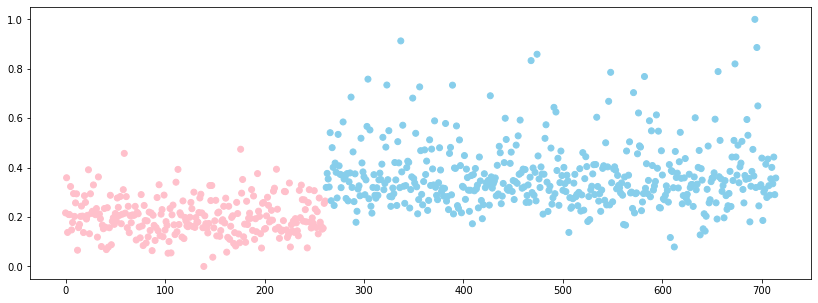

In [ ]:
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5
plt.scatter(range(len(x_test)), score, c=['skyblue' if x == 1 else 'pink' for x in y_test]) #pink가 true

In [ ]:
y_test = np.concatenate([np.zeros(shape=(100,), dtype=np.int8), np.ones(shape=(100,), dtype=np.int8), np.ones(shape=(100,), dtype=np.int8)*2])

In [ ]:
x_test = np.concatenate([x_ok[:100], x_test_ok[:100], x_test_notok[:100]])

In [ ]:
encoded = g_e.predict(x_test)
gan_x = g.predict(x_test)
encoded_gan = g_e.predict(gan_x)
score = np.sum(np.absolute(encoded - encoded_gan), axis=-1)
score = (score - np.min(score)) / (np.max(score) - np.min(score)) # map to 0~1

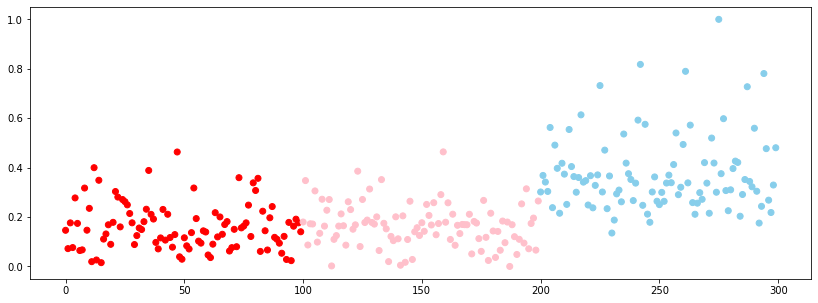

In [ ]:
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5
plt.scatter(range(len(x_test)), score, c=['red' if x == 0 else 'pink' if x==1 else 'skyblue' for x in y_test]) #pink가 true

빨간색이 train, 분홍색이 test 정상, 하늘색이 test 이상치 이미지이다. 각 그룹별 loss를 비교할 수 있다.

score 최소 - test normal

In [ ]:
np.where(score==np.min(score))

(array([187]), array([0]), array([0]))

In [ ]:
aa = np.where(score==np.min(score))[0][0]
score[aa]

array([[0.]], dtype=float32)

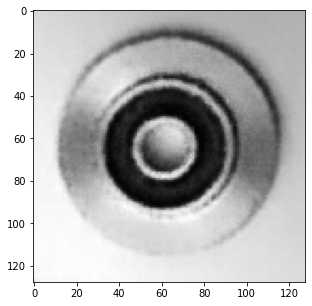

In [ ]:
i = aa
image = np.reshape(gan_x[i], (128, 128))
image = image * 127.5 + 127.5
plt.imshow(image.astype(np.uint8), cmap = 'gray')

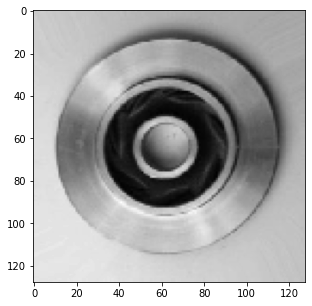

In [ ]:
i = aa
image = x_test[i].reshape(128,128) 
image = image * 127.5 + 127.5
plt.imshow(image.astype(np.uint8), cmap = 'gray')

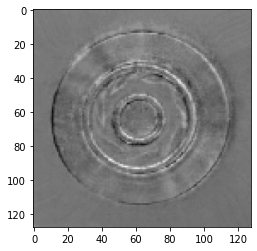

In [ ]:
gimage = np.reshape(gan_x[i], (128, 128))
gimage = gimage * 127.5 + 127.5

plt.figure(figsize=(4,4))
plt.imshow(((image.astype(int) - gimage.astype(int))), cmap = 'gray')

score 최대 - test abnormal

In [ ]:
np.where(score==np.max(score))

(array([275]), array([0]), array([0]))

In [ ]:
aa = np.where(score==np.max(score))[0][0]
score[aa]

array([[1.]], dtype=float32)

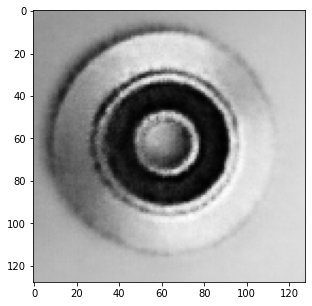

In [ ]:
i = aa
image = np.reshape(gan_x[i], (128, 128))
image = image * 127.5 + 127.5
plt.imshow(image.astype(np.uint8), cmap = 'gray')

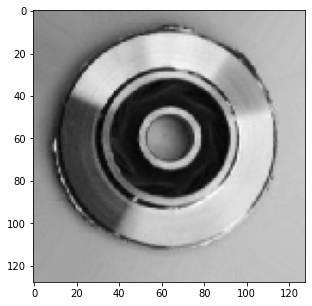

In [ ]:
i = aa
image = x_test[i].reshape(128,128) 
image = image * 127.5 + 127.5
plt.imshow(image.astype(np.uint8), cmap = 'gray')

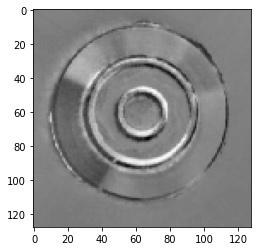

In [ ]:
gimage = np.reshape(gan_x[i], (128, 128))
gimage = gimage * 127.5 + 127.5

plt.figure(figsize=(4,4))
plt.imshow(((image.astype(int) - gimage.astype(int))), cmap = 'gray')

score 10번째로 큰 데이터

In [ ]:
np.where(score==np.sort(score, axis=0)[::-1][10])

(array([263]), array([0]), array([0]))

In [ ]:
aa = np.where(score==np.sort(score, axis=0)[::-1][10])[0][0]
score[aa]

array([[0.5719643]], dtype=float32)

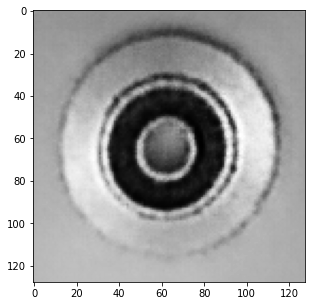

In [ ]:
i = aa
image = np.reshape(gan_x[i], (128, 128))
image = image * 127.5 + 127.5
plt.imshow(image.astype(np.uint8), cmap = 'gray')

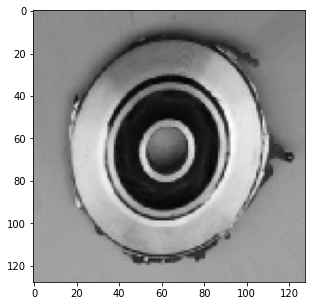

In [ ]:
i = aa
image = x_test[i].reshape(128,128) 
image = image * 127.5 + 127.5
plt.imshow(image.astype(np.uint8), cmap = 'gray')

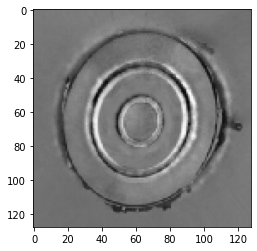

In [ ]:
gimage = np.reshape(gan_x[i], (128, 128))
gimage = gimage * 127.5 + 127.5

plt.figure(figsize=(4,4))
plt.imshow(((image.astype(int) - gimage.astype(int))), cmap = 'gray')

score 10번째로 작은 데이터

In [ ]:
np.where(score==np.sort(score, axis=0)[10])

(array([146]), array([0]), array([0]))

In [ ]:
aa = np.where(score==np.sort(score, axis=0)[10])[0][0]
score[aa]

array([[0.0281889]], dtype=float32)

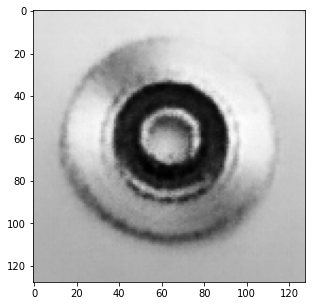

In [ ]:
i = aa
image = np.reshape(gan_x[i], (128, 128))
image = image * 127.5 + 127.5
plt.imshow(image.astype(np.uint8), cmap = 'gray')

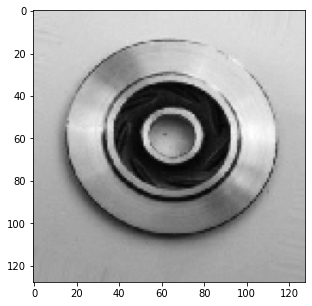

In [ ]:
i = aa
image = x_test[i].reshape(128,128) 
image = image * 127.5 + 127.5
plt.imshow(image.astype(np.uint8), cmap = 'gray')

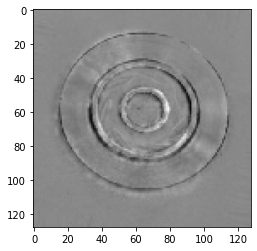

In [ ]:
gimage = np.reshape(gan_x[i], (128, 128))
gimage = gimage * 127.5 + 127.5

plt.figure(figsize=(4,4))
plt.imshow(((image.astype(int) - gimage.astype(int))), cmap = 'gray')